In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_2/titanic/titanic.csv", index_col = 0)

In [3]:
train_data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_2/titanic/titanic.csv", index_col = 0)
test_data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_2/titanic/test.csv", index_col = 0)

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))
train_data.isnull().sum()

Invalid values in train = 866


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
train_data = train_data.drop(['Cabin'], axis =1)
train_data = train_data.dropna(axis = 0)

In [7]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))

Invalid values in train = 0


In [8]:
print('Invalid values in test = {}'.format(test_data.isnull().values.sum()))
test_data.isnull().sum()

Invalid values in test = 414


Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
test_data = test_data.drop(['Cabin'], axis =1)
test_data = test_data.dropna(axis = 0)
test_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S


In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_data['Sex_label(f,m)'] = label.fit_transform(train_data['Sex'])
train_data['Embarked_label(C,Q,S)'] = label.fit_transform(train_data['Embarked'])
train_data = train_data.drop(['Sex'], axis = 1)
train_data = train_data.drop(['Embarked'], axis = 1)
train_data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,"Sex_label(f,m)","Embarked_label(C,Q,S)"
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2


In [11]:
label = LabelEncoder()
test_data['Sex_label(f,m)'] = label.fit_transform(test_data['Sex'])
test_data['Embarked_label(C,Q,S)'] = label.fit_transform(test_data['Embarked'])
test_data = test_data.drop(['Sex'], axis = 1)
test_data = test_data.drop(['Embarked'], axis = 1)
test_data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,"Sex_label(f,m)","Embarked_label(C,Q,S)"
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,2
894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1
895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,2
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,2


In [12]:
train_target = pd.DataFrame(train_data.Survived, columns = ['Survived'])
test_target = pd.DataFrame(test_data.Survived, columns = ['Survived'])

In [13]:
train_data = train_data.drop(['Name','Ticket'], axis = 1)
test_data = test_data.drop(['Name','Ticket'], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(test_data, test_target,test_size=0.3,random_state=0)

In [15]:
train_data.shape, X_val.shape, X_test.shape

((712, 8), (100, 8), (231, 8))

In [16]:
train_data = train_data.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

In [31]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics=["accuracy"]
             )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                90        
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [32]:
#fitting the model and predicting 

# fit network
history=model.fit(x=train_data, y=train_target, epochs=100, batch_size=32,validation_data= (X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 2.3050 - accuracy: 0.3666 - val_loss: 1.1444 - val_accuracy: 0.4000
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.9022 - accuracy: 0.3624 - val_loss: 0.6918 - val_accuracy: 0.5700
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.6138 - val_loss: 0.6947 - val_accuracy: 0.6300
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6615 - val_loss: 0.7321 - val_accuracy: 0.6200
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.6601 - val_loss: 0.6438 - val_accuracy: 0.6400
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6123 - accuracy: 0.6615 - val_loss: 0.6203 - val_accuracy: 0.6500
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6671 - val_loss: 0.7190 - val_accuracy: 0.6100
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9900
Epoch 60/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9916 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 61/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9958 - val_loss: 0.2118 - val_accuracy: 0.9300
Epoch 62/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0563 - accuracy: 0.9930 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 63/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 64/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9958 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 65/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9986 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 

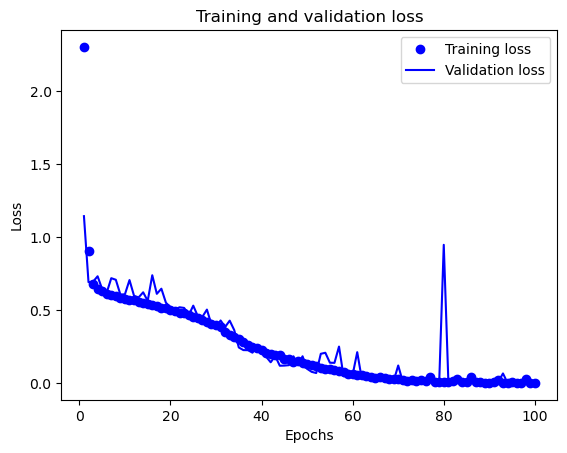

In [34]:
history_dict = history.history
acc = history_dict['accuracy']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 4.7408e-04 - accuracy: 1.0000
